<a href="https://colab.research.google.com/github/Gaya-2004/my-project/blob/main/NLP_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

import re, string, unicodedata
import nltk

!pip install contractions
import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [5]:
#READ CSV AND LOAD DATA
cdata = pd.read_csv('/content/Tweets.csv')
cdata.shape

(14640, 15)

In [6]:
# Top 10 Records
cdata.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [7]:
# Data Info
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
# Data Description
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [9]:
 # Dropping the other columns

 cdata = cdata[['airline_sentiment','text']]
 cdata.shape

(14640, 2)

In [10]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [11]:
cdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [12]:
print(cdata['text'][5])
print(cdata['text'][7])
print(cdata['text'][13])

@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn


In [13]:
# Remove HTML tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

cdata['text'] = cdata['text'].apply(lambda x: strip_html(x))
cdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [15]:
print(cdata['text'][5])
print(cdata['text'][7])
print(cdata['text'][13])

@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn


In [18]:
# Remove URL from Text

import re
def remove_url(rtext):
    rtext = re.sub(r':.*$', ":", rtext)
    return rtext

cdata['text'] = cdata['text'].apply(lambda x: remove_url(x))
print(cdata['text'][5])
print(cdata['text'][7])
print(cdata['text'][13])

@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.
it is really the only bad thing about flying VA
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https:
@VirginAmerica @virginmedia I am flying your #fabulous #Seductive skies again! YOU take all the #stress away from travel http:


In [19]:
# Replace contractions in string of text

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

cdata['text'] = cdata['text'].apply(lambda x: replace_contractions(x))
cdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [20]:
#Tokenization.

import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer=ToktokTokenizer()

def token_generator(text):
  modified_text = tokenizer.tokenize(text)
  return modified_text

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = token_generator(cdata['text'][i])

print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])

['@VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing.', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']
['@VirginAmerica', '@virginmedia', 'I', 'am', 'flying', 'your', '#fabulous', '#Seductive', 'skies', 'again', '!', 'YOU', 'take', 'all', 'the', '#stress', 'away', 'from', 'travel', 'http', ':']
['@VirginAmerica', 'Really', 'missed', 'a', 'prime', 'opportunity', 'for', 'Men', 'Without', 'Hats', 'parody', ',', 'there.', 'https', ':']


In [21]:
# Remove Numbers

def remove_numbers(text):
  modified_text = []
  for w in text:
    modified_text.append(re.sub("[0-9]", "", w))
  return modified_text

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = remove_numbers(cdata['text'][i])
print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])
cdata.head()

['@VirginAmerica', 'seriously', 'would', 'pay', '$', '', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing.', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']
['@VirginAmerica', '@virginmedia', 'I', 'am', 'flying', 'your', '#fabulous', '#Seductive', 'skies', 'again', '!', 'YOU', 'take', 'all', 'the', '#stress', 'away', 'from', 'travel', 'http', ':']
['@VirginAmerica', 'Really', 'missed', 'a', 'prime', 'opportunity', 'for', 'Men', 'Without', 'Hats', 'parody', ',', 'there.', 'https', ':']


,airline_sentiment,text
0,neutral,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,"[@VirginAmerica, plus, you, have, added, comme..."
2,neutral,"[@VirginAmerica, I, did, not, today, ..., Must..."
3,negative,"[@VirginAmerica, it, is, really, aggressive, t..."
4,negative,"[@VirginAmerica, and, it, is, a, really, big, ..."


In [22]:
# Remove Special Characters

def remove_special_char(text):
  modified_text = []
  for w in text:
    modified_text.append(re.sub("[^A-Za-z\s ]", "", w))
  return modified_text

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = remove_special_char(cdata['text'][i])

print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])
cdata.head()

['VirginAmerica', 'seriously', 'would', 'pay', '', '', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']
['VirginAmerica', 'virginmedia', 'I', 'am', 'flying', 'your', 'fabulous', 'Seductive', 'skies', 'again', '', 'YOU', 'take', 'all', 'the', 'stress', 'away', 'from', 'travel', 'http', '']
['VirginAmerica', 'Really', 'missed', 'a', 'prime', 'opportunity', 'for', 'Men', 'Without', 'Hats', 'parody', '', 'there', 'https', '']


,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said, ]"
1,positive,"[VirginAmerica, plus, you, have, added, commer..."
2,neutral,"[VirginAmerica, I, did, not, today, , Must, me..."
3,negative,"[VirginAmerica, it, is, really, aggressive, to..."
4,negative,"[VirginAmerica, and, it, is, a, really, big, b..."


In [23]:
# Convert to Lowercase

def lowercase(text):
  modified_text = []
  for w in text:
    modified_text.append(w.lower())
  return modified_text

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = lowercase(cdata['text'][i])

print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])
cdata.head()

['virginamerica', 'seriously', 'would', 'pay', '', '', 'a', 'flight', 'for', 'seats', 'that', 'did', 'not', 'have', 'this', 'playing', 'it', 'is', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va']
['virginamerica', 'virginmedia', 'i', 'am', 'flying', 'your', 'fabulous', 'seductive', 'skies', 'again', '', 'you', 'take', 'all', 'the', 'stress', 'away', 'from', 'travel', 'http', '']
['virginamerica', 'really', 'missed', 'a', 'prime', 'opportunity', 'for', 'men', 'without', 'hats', 'parody', '', 'there', 'https', '']


,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said, ]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, , must, me..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


In [25]:
# Stop Words

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist))

#Remove stop words from list of tokenized words

#stopwords = stopwords.words('english')
def remove_stops(text):
  rtext =[]
  rtext = [w for w in text if not w in stopwords]
  return rtext

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = remove_stops(cdata['text'][i])

print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])
cdata.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['virginamerica', 'seriously', 'would', 'pay', '', '', 'flight', 'seats', 'not', 'playing', 'really', 'bad', 'thing', 'flying', 'va']
['virginamerica', 'virginmedia', 'flying', 'fabulous', 'seductive', 'skies', '', 'take', 'stress', 'away', 'travel', 'http', '']
['virginamerica', 'really', 'missed', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody', '', 'https', '']


,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said, ]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, not, today, , must, mean, need..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


In [26]:
# Adding Lemmatizer

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

cdata['text'] = cdata.apply(lambda row: lemmatize_list(row['text']), axis=1)
cdata.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, say, ]"
1,positive,"[virginamerica, plus, add, commercials, experi..."
2,neutral,"[virginamerica, not, today, , must, mean, need..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


In [27]:
# Normalize words

def normalize(words):
    return ' '.join(words)

cdata['text'] = cdata.apply(lambda row: normalize(row['text']), axis=1)
cdata.head()


,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take a...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [28]:
# Remove Extra Whitespaces
def remove_extra_whitespace(text):
  text = re.sub("\s+", " ", text)
  return text

for i in range(cdata['airline_sentiment'].size):
  cdata['text'][i] = remove_extra_whitespace(cdata['text'][i])


print(cdata['text'][5])
print(cdata['text'][13])
print(cdata['text'][7])
cdata.head()

virginamerica seriously would pay flight seat not play really bad thing fly va
virginamerica virginmedia fly fabulous seductive sky take stress away travel http 
virginamerica really miss prime opportunity men without hat parody https 


,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [30]:
# Vectorization (Convert text data to numbers).

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
fdata = vectorizer.fit_transform(cdata['text'])

fdata = fdata.toarray()                        # Convert the data features to array.
print(fdata.shape)
print('\n')
print(vectorizer)

(14640, 1000)


CountVectorizer(max_features=1000)


In [31]:
# Dependent Variable - Counts

cdata['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [32]:
cdata['airline_sentiment'].value_counts(normalize=True)

,proportion
airline_sentiment,
negative,0.626913
neutral,0.211680
positive,0.161407


In [33]:
# Convert sentiment (Y-axis) from word to number.
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()

y = cdata['airline_sentiment']
y_num = label_encoder.fit_transform(y)

# Convert above numpy array to Series
y_numeric = pd.Series(y_num)

df_y_dict = {'Sentiment_Word': y, 'Sentiment_Numeric': y_numeric}
print(type(df_y_dict))

# Finally convert dictionary into a dataframe
y_def = pd.DataFrame(df_y_dict)

# Drop duplicates from dataframe to retain 1:1 mapping between labels and their class number
y_def.drop_duplicates(inplace=True)
y_def.head()

<class 'dict'>


,Sentiment_Word,Sentiment_Numeric
0,neutral,1
1,positive,2
3,negative,0


In [34]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fdata, y, test_size=0.3, random_state=42)

X_train =  np.array(X_train)
X_test =  np.array(X_test)
y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10248, 1000)
(10248,)
(4392, 1000)
(4392,)


In [36]:
# Using Random Forest to build model for the classification of reviews.

# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, fdata, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7102459016393443


In [37]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2501  225   88]
 [ 392  400   92]
 [ 201   97  396]]


<Axes: >

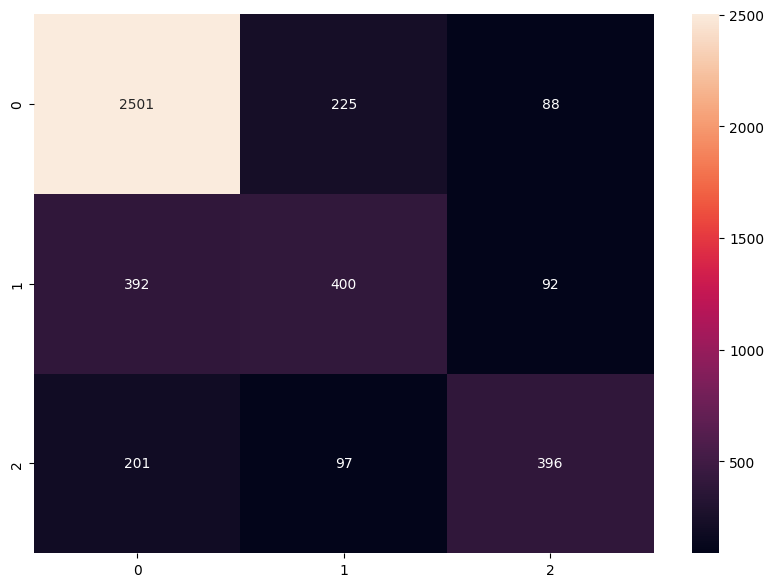

In [38]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary

The given data bias towards Negative comments so Negative has higher predicted accuracy.

Due to less data in Positive and Neutral category - model suffers to predict.

Most of the Neutral comments were predicted as Negative because Negative has higher counts

In [39]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
f1data = vectorizer.fit_transform(cdata['text'])

f1data = f1data.toarray()

f1data.shape

(14640, 1000)

In [40]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f1data, y, test_size=0.3, random_state=42)

In [41]:
# Using Random Forest to build model for the classification of reviews.

# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, f1data, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7147540983606557


<Axes: >

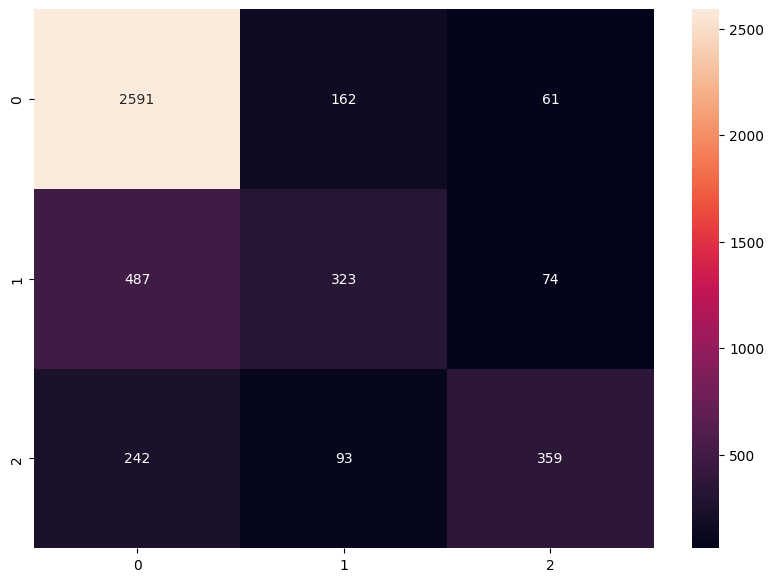

In [42]:
result = forest.predict(X_test)
# Confustion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')